<a href="https://colab.research.google.com/github/TUBES-AKA-TUP-2025/Perbandingan-Algoritma-Flood-Fill-Python-2025/blob/main/KOd_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import time
import matplotlib.pyplot as plt
import copy


In [2]:

# ==========================================
# 1. Konfigurasi & Setup
# ==========================================
# Meningkatkan batas rekursi untuk mengakomodasi grid yang besar
# Default Python biasanya 1000, kita naikkan agar tidak crash terlalu dini
sys.setrecursionlimit(20000)


In [3]:

# ==========================================
# 2. Implementasi Algoritma
# ==========================================

def flood_fill_recursive(grid, x, y, new_color, old_color):
    """
    Pendekatan Rekursif (Depth First Search implisit via Call Stack)
    """
    rows = len(grid)
    cols = len(grid[0])

    # Base cases: Cek batas grid dan apakah warna sesuai target
    if x < 0 or x >= rows or y < 0 or y >= cols:
        return
    if grid[x][y] != old_color:
        return
    if grid[x][y] == new_color:
        return

    # Warnai piksel saat ini
    grid[x][y] = new_color

    # Panggil diri sendiri untuk 4 arah (Atas, Bawah, Kiri, Kanan)
    flood_fill_recursive(grid, x + 1, y, new_color, old_color)
    flood_fill_recursive(grid, x - 1, y, new_color, old_color)
    flood_fill_recursive(grid, x, y + 1, new_color, old_color)
    flood_fill_recursive(grid, x, y - 1, new_color, old_color)

def flood_fill_iterative(grid, x, y, new_color, old_color):
    """
    Pendekatan Iteratif (Menggunakan List sebagai Stack eksplisit)
    """
    rows = len(grid)
    cols = len(grid[0])

    if grid[x][y] != old_color or grid[x][y] == new_color:
        return

    # Inisialisasi Stack dengan titik awal
    stack = [(x, y)]

    while stack:
        cx, cy = stack.pop() # Ambil elemen terakhir (LIFO)

        if grid[cx][cy] == old_color:
            grid[cx][cy] = new_color

            # Push tetangga ke stack (Atas, Bawah, Kiri, Kanan)
            if cx + 1 < rows: stack.append((cx + 1, cy))
            if cx - 1 >= 0:   stack.append((cx - 1, cy))
            if cy + 1 < cols: stack.append((cx, cy + 1))
            if cy - 1 >= 0:   stack.append((cx, cy - 1))



In [4]:
# ==========================================
# 3. Fungsi Pengujian (Benchmarking)
# ==========================================

def run_benchmark():
    # Ukuran sisi grid (N x N) yang akan diuji
    # Hati-hati: Rekursif bisa crash pada ukuran > 100 di Python standar meski limit dinaikkan
    grid_sizes = [10, 20, 40, 60, 80, 100, 120, 150]

    times_recursive = []
    times_iterative = []

    print(f"{'Size (NxN)':<15} | {'Recursive (s)':<15} | {'Iterative (s)':<15}")
    print("-" * 50)

    for n in grid_sizes:
        # Membuat grid kosong (berisi 0) untuk Worst Case Scenario
        # Worst case adalah mengisi SELURUH grid.
        base_grid = [[0 for _ in range(n)] for _ in range(n)]

        # --- Uji Rekursif ---
        grid_rec = copy.deepcopy(base_grid)
        start_time = time.time()
        try:
            flood_fill_recursive(grid_rec, 0, 0, 1, 0)
            end_time = time.time()
            rec_duration = end_time - start_time
        except RecursionError:
            rec_duration = None # Menandakan Stack Overflow
            print(f"Recursion Limit Hit at size {n}")

        times_recursive.append(rec_duration)

        # --- Uji Iteratif ---
        grid_iter = copy.deepcopy(base_grid)
        start_time = time.time()
        flood_fill_iterative(grid_iter, 0, 0, 1, 0)
        end_time = time.time()
        iter_duration = end_time - start_time

        times_iterative.append(iter_duration)

        # Print log per iterasi
        rec_disp = f"{rec_duration:.6f}" if rec_duration is not None else "OVERFLOW"
        print(f"{n}x{n:<12} | {rec_disp:<15} | {iter_duration:.6f}")

    return grid_sizes, times_recursive, times_iterative



In [5]:
# ==========================================
# 4. Visualisasi Grafik
# ==========================================

def plot_results(sizes, t_rec, t_iter):
    plt.figure(figsize=(10, 6))

    # Filter data None (jika terjadi recursion error) agar tidak error saat plotting
    clean_rec = [(s, t) for s, t in zip(sizes, t_rec) if t is not None]
    if clean_rec:
        x_rec, y_rec = zip(*clean_rec)
        plt.plot(x_rec, y_rec, marker='o', label='Rekursif', color='red', linestyle='--')

    plt.plot(sizes, t_iter, marker='s', label='Iteratif (Stack)', color='blue')

    plt.title('Perbandingan Performa Flood Fill: Rekursif vs Iteratif')
    plt.xlabel('Ukuran Grid (N x N)')
    plt.ylabel('Waktu Eksekusi (detik)')
    plt.grid(True)
    plt.legend()

    # Menambahkan anotasi kompleksitas
    plt.text(sizes[-1], t_iter[-1], f" O(N^2)", fontsize=10, verticalalignment='bottom')

    plt.show()



Memulai Analisis Kompleksitas Flood Fill...
Size (NxN)      | Recursive (s)   | Iterative (s)  
--------------------------------------------------
10x10           | 0.000215        | 0.000122
20x20           | 0.000775        | 0.000768
40x40           | 0.005118        | 0.003117
60x60           | 0.010273        | 0.007460
80x80           | 0.013155        | 0.008392
100x100          | 0.020667        | 0.013434
120x120          | 0.029869        | 0.018957
Recursion Limit Hit at size 150
150x150          | OVERFLOW        | 0.036547


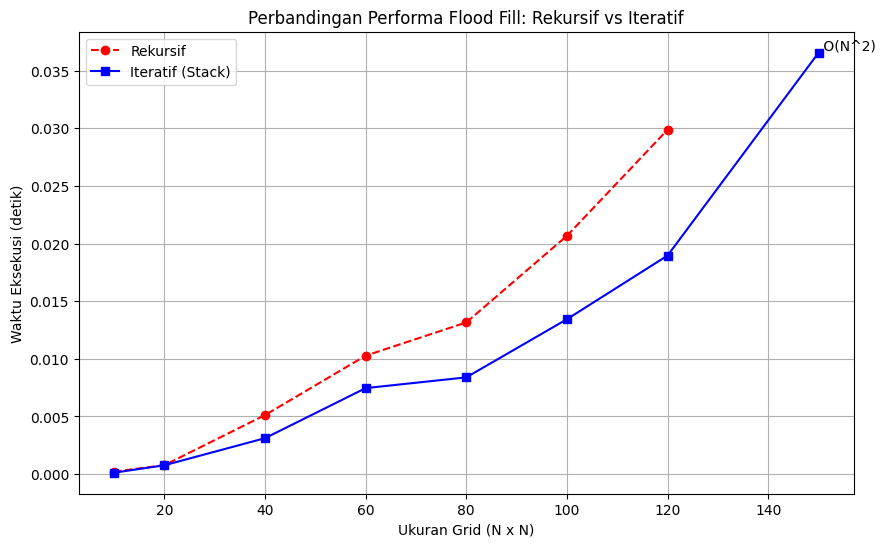

In [6]:
# ==========================================
# Main Program
# ==========================================
if __name__ == "__main__":
    print("Memulai Analisis Kompleksitas Flood Fill...")
    sizes, t_rec, t_iter = run_benchmark()
    plot_results(sizes, t_rec, t_iter)

=== KONFIGURASI BENCHMARKING ===
Masukkan ukuran awal grid (misal: 10): 2
Masukkan ukuran akhir grid (misal: 200): 28
Masukkan step kenaikan (misal: 20): 2

[INFO] System Recursion Limit diatur ke: 2784

Size (NxN)      | Recursive (s)   | Iterative (s)  
-------------------------------------------------------
2x2            | 0.000008        | 0.000008       
4x4            | 0.000016        | 0.000013       
6x6            | 0.000070        | 0.000029       
8x8            | 0.000105        | 0.000146       
10x10           | 0.000156        | 0.000074       
12x12           | 0.000154        | 0.000089       
14x14           | 0.000284        | 0.000130       
16x16           | 0.000290        | 0.000207       
18x18           | 0.000361        | 0.000232       
20x20           | 0.000451        | 0.000282       
22x22           | 0.000635        | 0.000290       
24x24           | 0.000638        | 0.000329       
26x26           | 0.000766        | 0.000377       
28x28           

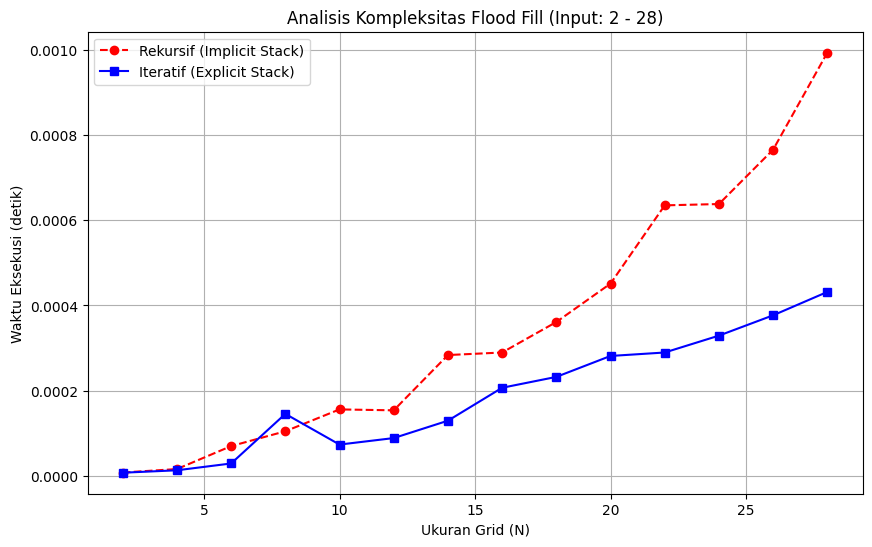

In [8]:
import sys
import time
import copy

# Pastikan fungsi flood_fill_recursive dan flood_fill_iterative
# sudah didefinisikan sebelumnya (seperti pada kode di atas).

def run_benchmark_custom_input():
    """
    Fungsi benchmark yang meminta input range ukuran grid dari pengguna.
    Mengatur limit rekursi secara dinamis berdasarkan input terbesar.
    """
    print("=== KONFIGURASI BENCHMARKING ===")
    try:
        start_n = int(input("Masukkan ukuran awal grid (misal: 10): "))
        end_n = int(input("Masukkan ukuran akhir grid (misal: 200): "))
        step_n = int(input("Masukkan step kenaikan (misal: 20): "))
    except ValueError:
        print("Input harus berupa angka integer.")
        return [], [], []

    # Generate list ukuran yang akan diuji
    grid_sizes = list(range(start_n, end_n + 1, step_n))

    # SETUP DINAMIS: Menyesuaikan batas rekursi
    # Kita set limit sedikit lebih besar dari N*N (worst case linear path)
    # atau N*4 (umum) untuk jaga-jaga.
    # Namun, OS hard limit mungkin tetap membatasi ini.
    needed_limit = (end_n * end_n) + 2000
    sys.setrecursionlimit(needed_limit)
    print(f"\n[INFO] System Recursion Limit diatur ke: {sys.getrecursionlimit()}")

    times_recursive = []
    times_iterative = []

    print(f"\n{'Size (NxN)':<15} | {'Recursive (s)':<15} | {'Iterative (s)':<15}")
    print("-" * 55)

    for n in grid_sizes:
        # Skenario Worst Case: Grid kosong (0) yang harus diisi penuh menjadi (1)
        base_grid = [[0 for _ in range(n)] for _ in range(n)]

        # --- 1. Uji Rekursif ---
        grid_rec = copy.deepcopy(base_grid)

        start_time = time.time()
        try:
            # Panggil fungsi rekursif
            flood_fill_recursive(grid_rec, 0, 0, 1, 0)
            end_time = time.time()
            rec_duration = end_time - start_time
            rec_display = f"{rec_duration:.6f}"
        except RecursionError:
            # Jika Stack Overflow terjadi
            rec_duration = None
            rec_display = "CRASH (Overflow)"
        except MemoryError:
             # Jika RAM habis (sangat jarang untuk rekursif, biasanya stack duluan)
            rec_duration = None
            rec_display = "CRASH (Memory)"

        times_recursive.append(rec_duration)

        # --- 2. Uji Iteratif ---
        grid_iter = copy.deepcopy(base_grid)

        start_time = time.time()
        try:
            # Panggil fungsi iteratif
            flood_fill_iterative(grid_iter, 0, 0, 1, 0)
            end_time = time.time()
            iter_duration = end_time - start_time
            iter_display = f"{iter_duration:.6f}"
        except Exception as e:
            iter_duration = None
            iter_display = "ERROR"

        times_iterative.append(iter_duration)

        # Tampilkan hasil real-time
        print(f"{n}x{n:<12} | {rec_display:<15} | {iter_display:<15}")

    return grid_sizes, times_recursive, times_iterative

# ==========================================
# Cara Menjalankan
# ==========================================
if __name__ == "__main__":
    # 1. Jalankan Benchmark
    sizes, t_rec, t_iter = run_benchmark_custom_input()

    # 2. Plotting (Menggunakan fungsi plot sebelumnya)
    # Pastikan Anda mengimpor plot_results dari kode sebelumnya
    if sizes:
        # Import matplotlib jika belum
        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 6))

        # Plot Rekursif (Hanya data yang tidak None)
        clean_rec = [(s, t) for s, t in zip(sizes, t_rec) if t is not None]
        if clean_rec:
            x_rec, y_rec = zip(*clean_rec)
            plt.plot(x_rec, y_rec, marker='o', label='Rekursif (Implicit Stack)', color='red', linestyle='--')

        # Plot Iteratif
        clean_iter = [(s, t) for s, t in zip(sizes, t_iter) if t is not None]
        if clean_iter:
            x_iter, y_iter = zip(*clean_iter)
            plt.plot(x_iter, y_iter, marker='s', label='Iteratif (Explicit Stack)', color='blue')

        plt.title(f'Analisis Kompleksitas Flood Fill (Input: {sizes[0]} - {sizes[-1]})')
        plt.xlabel('Ukuran Grid (N)')
        plt.ylabel('Waktu Eksekusi (detik)')
        plt.grid(True)
        plt.legend()
        plt.show()